<a href="https://colab.research.google.com/github/nramelia2/DATA-SCIENTIST/blob/main/10%20CLASSIFICATION%20AND%20REGRESSION/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

array([[<AxesSubplot:title={'center':'radius_mean'}>]], dtype=object)

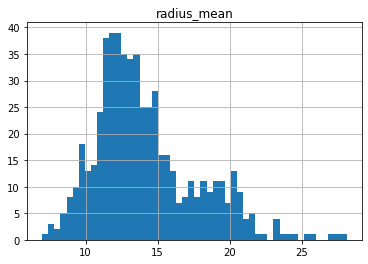

In [ ]:
df.hist(column='radius_mean', bins=50)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
X = df[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] .values  #.astype(float)
X[0:10]


array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, 1.2280000e+02,
        1.0010000e+03, 1.1840000e-01, 2.7760000e-01, 3.0010000e-01,
        1.4710000e-01, 2.4190000e-01, 7.8710000e-02, 1.0950000e+00,
        9.0530000e-01, 8.5890000e+00, 1.5340000e+02, 6.3990000e-03,
        4.9040000e-02, 5.3730000e-02, 1.5870000e-02, 3.0030000e-02,
        6.1930000e-03, 2.5380000e+01, 1.7330000e+01, 1.8460000e+02,
        2.0190000e+03, 1.6220000e-01, 6.6560000e-01, 7.1190000e-01,
        2.6540000e-01, 4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, 1.3290000e+02,
        1.3260000e+03, 8.4740000e-02, 7.8640000e-02, 8.6900000e-02,
        7.0170000e-02, 1.8120000e-01, 5.6670000e-02, 5.4350000e-01,
        7.3390000e-01, 3.3980000e+00, 7.4080000e+01, 5.2250000e-03,
        1.3080000e-02, 1.8600000e-02, 1.3400000e-02, 1.3890000e-02,
        3.5320000e-03, 2.4990000e+01, 2.3410000e+01, 1.5880000e+02,
        1.9560000e+03, 1.2380000e-01, 1.8660000e-01, 2.4160000

In [ ]:
y = df['diagnosis'].values
y[0:20]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B'], dtype=object)

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-2.36405166e-01,  1.09706398e+00, -2.07333501e+00,
         1.26993369e+00,  9.84374905e-01,  1.56846633e+00,
         3.28351467e+00,  2.65287398e+00,  2.53247522e+00,
         2.21751501e+00,  2.25574689e+00,  2.48973393e+00,
        -5.65265059e-01,  2.83303087e+00,  2.48757756e+00,
        -2.14001647e-01,  1.31686157e+00,  7.24026158e-01,
         6.60819941e-01,  1.14875667e+00,  9.07083081e-01,
         1.88668963e+00, -1.35929347e+00,  2.30360062e+00,
         2.00123749e+00,  1.30768627e+00,  2.61666502e+00,
         2.10952635e+00,  2.29607613e+00,  2.75062224e+00,
         1.93701461e+00],
       [-2.36403445e-01,  1.82982061e+00, -3.53632408e-01,
         1.68595471e+00,  1.90870825e+00, -8.26962447e-01,
        -4.87071673e-01, -2.38458552e-02,  5.48144156e-01,
         1.39236330e-03, -8.68652457e-01,  4.99254601e-01,
        -8.76243603e-01,  2.63326966e-01,  7.42401948e-01,
        -6.05350847e-01, -6.92926270e-01, -4.40780058e-01,
         2.60162067e-01, -8.05

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 31) (455,)
Test set: (114, 31) (114,)


### K Nearest Neighbor (K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:50]

array(['B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M'],
      dtype=object)

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9802197802197802
Test set Accuracy:  0.9736842105263158


In [ ]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94736842, 0.97368421, 0.97368421, 0.97368421, 0.96491228,
       0.97368421, 0.95614035, 0.97368421, 0.98245614, 0.98245614])

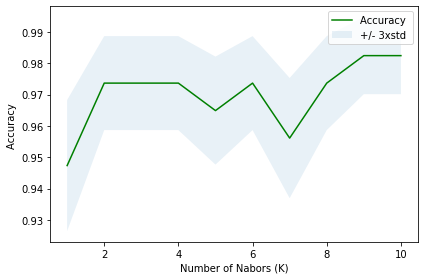

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max()*100, "with k=", mean_acc.argmax()+1) 

The best accuracy was with 98.24561403508771 with k= 9


### Decision Trees

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

###### Decision Tree with Gini

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
# Check accuracy score with criterion gini index
# Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8772


In [ ]:
# Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9780


In [ ]:
# Check for overfitting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9780
Test set score: 0.8772


[Text(334.8, 380.52, 'X[23] <= -0.039\ngini = 0.476\nsamples = 455\nvalue = [277, 178]'),
 Text(167.4, 271.8, 'X[28] <= 0.674\ngini = 0.097\nsamples = 275\nvalue = [261, 14]'),
 Text(83.7, 163.07999999999998, 'X[14] <= 1.127\ngini = 0.051\nsamples = 267\nvalue = [260, 7]'),
 Text(41.85, 54.360000000000014, 'gini = 0.044\nsamples = 266\nvalue = [260, 6]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 163.07999999999998, 'X[14] <= -0.586\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 54.360000000000014, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(502.20000000000005, 271.8, 'X[24] <= -0.022\ngini = 0.162\nsamples = 180\nvalue = [16, 164]'),
 Text(418.5, 163.07999999999998, 'X[25] <= -0.341\ngini = 0.499\nsamples = 29\nvalue = [14, 15]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 11\nvalue = [11, 0

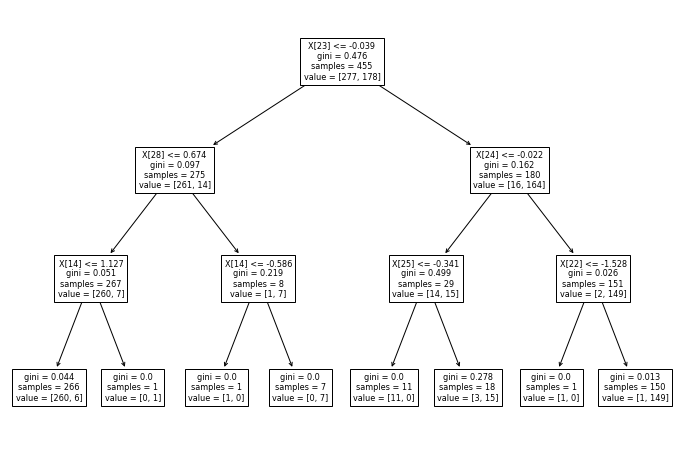

In [ ]:
# Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

###### Decision Tree Classifier with criterion entropy

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [ ]:
# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9474


In [ ]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9714


In [ ]:
# Check for overfitting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9714
Test set score: 0.9474


[Text(386.3076923076923, 380.52, 'X[24] <= -0.022\nentropy = 0.966\nsamples = 455\nvalue = [277, 178]'),
 Text(206.03076923076924, 271.8, 'X[28] <= 0.325\nentropy = 0.454\nsamples = 304\nvalue = [275, 29]'),
 Text(103.01538461538462, 163.07999999999998, 'X[2] <= 0.499\nentropy = 0.155\nsamples = 268\nvalue = [262, 6]'),
 Text(51.50769230769231, 54.360000000000014, 'entropy = 0.041\nsamples = 226\nvalue = [225, 1]'),
 Text(154.52307692307693, 54.360000000000014, 'entropy = 0.527\nsamples = 42\nvalue = [37, 5]'),
 Text(309.04615384615386, 163.07999999999998, 'X[2] <= 0.251\nentropy = 0.944\nsamples = 36\nvalue = [13, 23]'),
 Text(257.53846153846155, 54.360000000000014, 'entropy = 0.934\nsamples = 20\nvalue = [13, 7]'),
 Text(360.55384615384617, 54.360000000000014, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(566.5846153846154, 271.8, 'X[2] <= -1.009\nentropy = 0.102\nsamples = 151\nvalue = [2, 149]'),
 Text(515.0769230769231, 163.07999999999998, 'X[16] <= -0.427\nentropy = 0.91

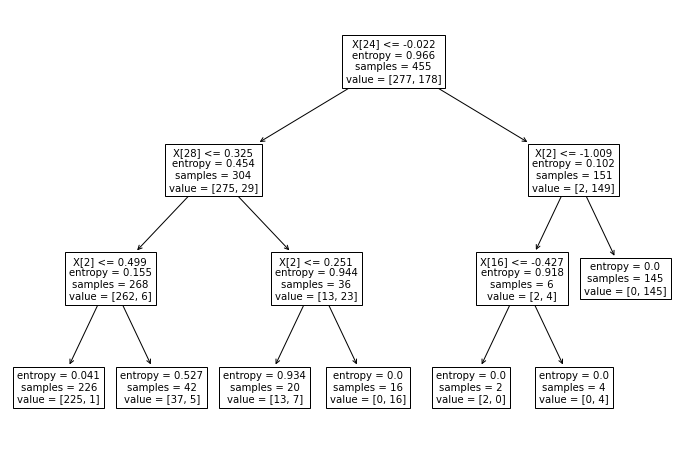

In [ ]:
# Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100, 2)
acc_decision_tree

100.0

### SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 31) (455,)
Test set: (114, 31) (114,)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train) 

SVC(gamma='auto')

In [ ]:
yhat = clf.predict(X_test)
yhat [0:20]

array(['B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9739887531693683

In [ ]:
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, yhat)
#jaccard_score(y_test, yhat, average=None)


from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat, average='macro')

0.9407094594594595

In [ ]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

98.68

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

93.63

### Model Evaluation

In [ ]:

models = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'SVM', 'Gaussian Naive Bayes'],
    'Score': [ mean_acc.max()*100, acc_decision_tree,
             acc_svc, acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,100.000000
2,SVM,98.680000
0,KNN,98.245614
3,Gaussian Naive Bayes,93.630000
